**LOADING DATASET**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/MLDATASETS/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Converting TotalCharges from object to number

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


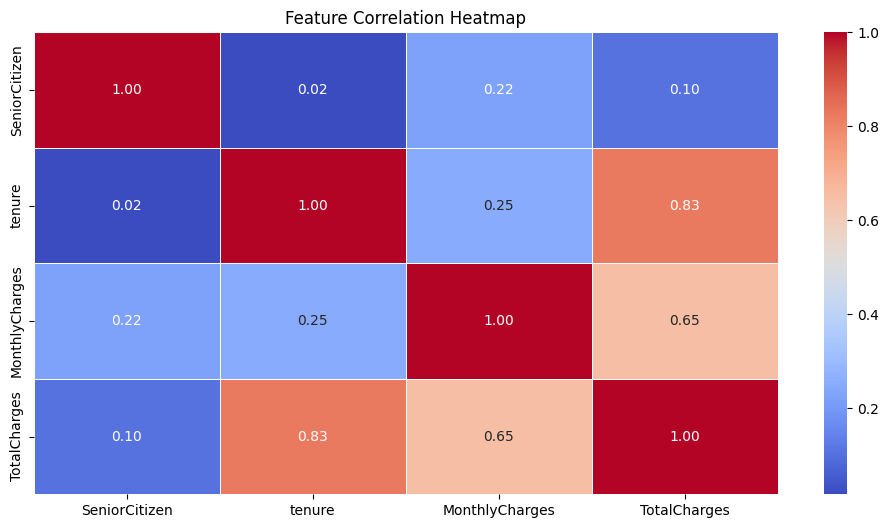

In [ ]:
# CORRELATION MATRIX

import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



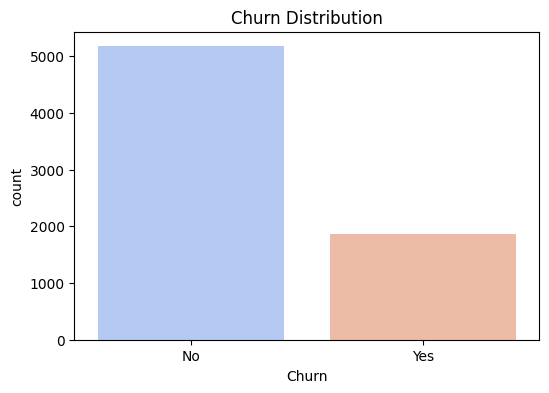

In [ ]:
# COUNT PLOT

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='coolwarm', legend=False)
plt.title("Churn Distribution")
plt.show()


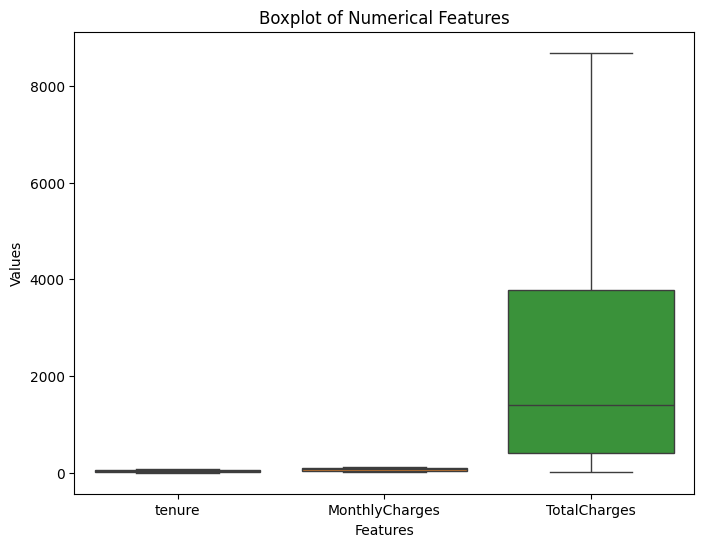

In [ ]:
# BOX PLOT

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

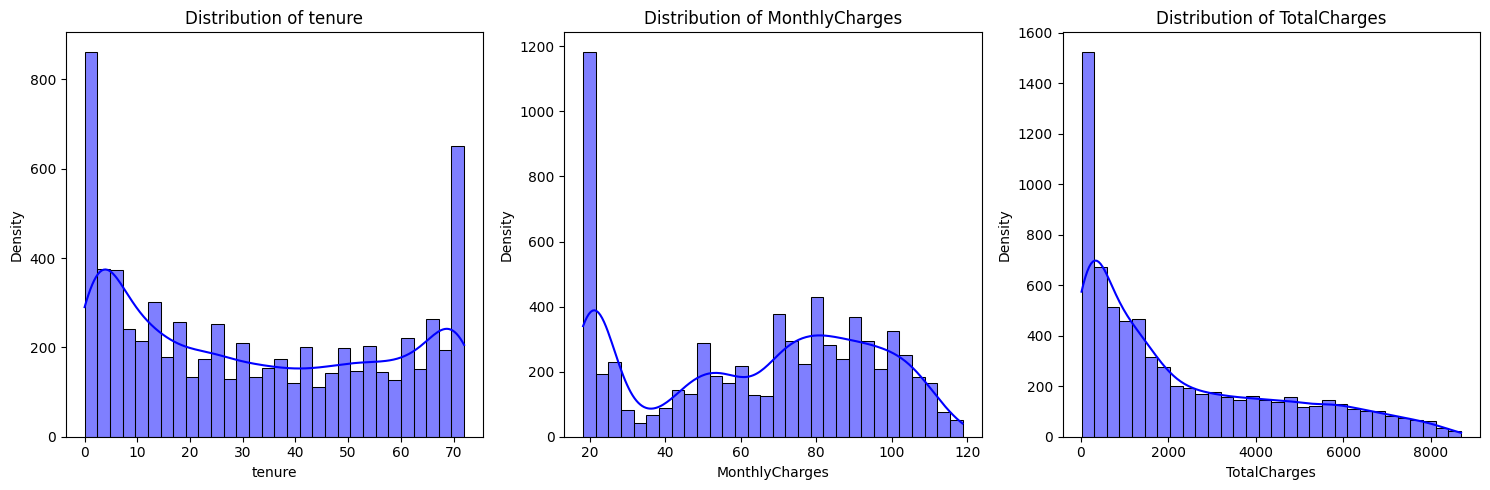

In [ ]:
# DISTRIBUTION PLOT

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


**PRE-PROCESSING**

In [ ]:
# CHECKING FOR MISSING VALUES

print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# DROPPING UNNECSSARY FEATURES

df.drop(columns=['customerID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# ENCODING CATEGORICAL FEATURES

from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}  # Dictionary to store label encoders
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode training data
    label_encoders[col] = le  # Save encoder for later use

# Save the encoders
import pickle
with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("Encoders saved successfully!")
df.info()
df.head()


Encoders saved successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# STANDARDIZATION

scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [ ]:
# TRAINING AND EVALUATING MODELS
# LOGISTIC REGRESSION
# RANDOM FOREST
# SUPPORT VECTOR MACHINE
# K-NEAREST NEIGHBOUR
# eXtreme Gradient Boosting

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split dataset
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def evaluate_model(model, name):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy

    print(f"\n📌 {name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return accuracy


📌 Logistic Regression Accuracy: 0.8176
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



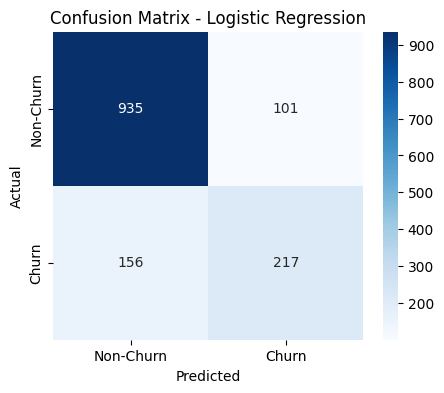

In [ ]:
# LOGISTIC REGRESSION
logistic_acc = evaluate_model(LogisticRegression(), "Logistic Regression")


📌 Random Forest Accuracy: 0.7970
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



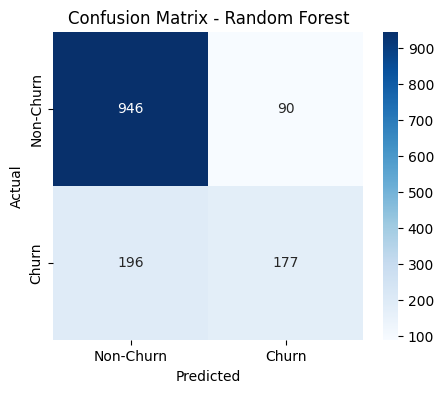

In [ ]:
# RANDOM FOREST
rf_acc = evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")


📌 SVM Accuracy: 0.8176
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



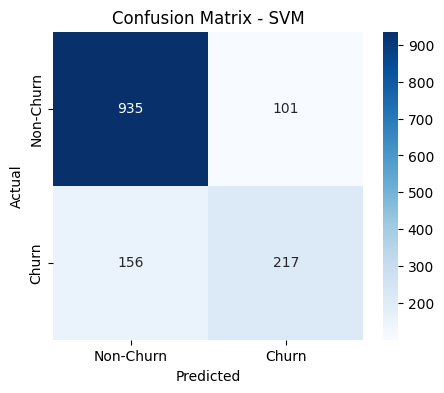

In [ ]:
# SUPPORT VECTOR MACHINE
svm_acc = evaluate_model(SVC(kernel='linear'), "SVM")


📌 KNN Accuracy: 0.7764
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.59      0.51      0.55       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



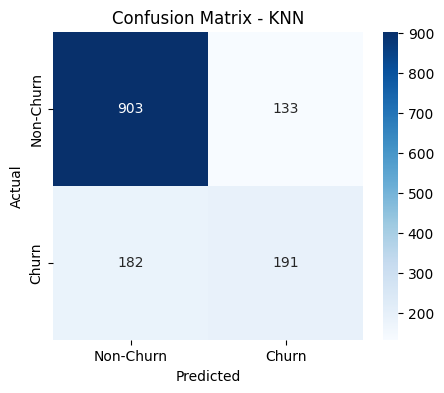

In [ ]:
# K-NEAREST NEIGHBOUR
knn_acc = evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN")


📌 XGBoost Accuracy: 0.8055
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



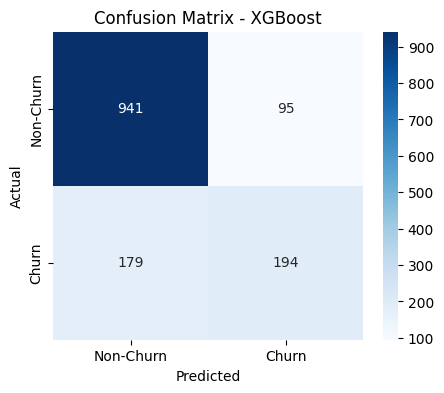

In [ ]:
# eXtreme Gradient Boosting
xgb_acc = evaluate_model(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42), "XGBoost")

In [ ]:
# DISPLAYING RESULTS

print("\n🔹 Model Comparison:")
print(f"Logistic Regression: {logistic_acc:.4f}")
print(f"Random Forest: {rf_acc:.4f}")
print(f"SVM: {svm_acc:.4f}")
print(f"KNN: {knn_acc:.4f}")
print(f"XGBoost: {xgb_acc:.4f}")


🔹 Model Comparison:
Logistic Regression: 0.8176
Random Forest: 0.7970
SVM: 0.8176
KNN: 0.7764
XGBoost: 0.8055


In [ ]:
# APPLYING SMOTE TO BALANCE DATASET

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting dataset
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Dataset balanced using SMOTE.")


Dataset balanced using SMOTE.


In [ ]:
# TRAINING AND EVALUATING MODELS AFTER APPLYING SMOTE

def evaluate_model(model, name):
    model.fit(X_train_balanced, y_train_balanced)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy

    print(f"\n📌 {name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return accuracy


📌 Logistic Regression Accuracy: 0.7324
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409



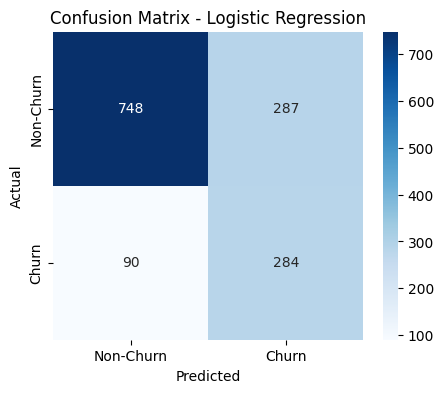

In [ ]:
# LOGISTIC REGRESSION
logistic_acc = evaluate_model(LogisticRegression(), "Logistic Regression")


📌 Random Forest Accuracy: 0.7672
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.71      1409
weighted avg       0.78      0.77      0.77      1409



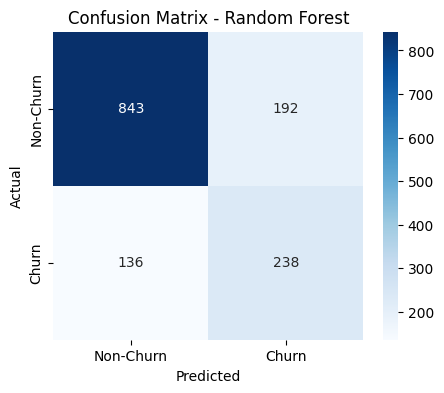

In [ ]:
# RANDOM FOREST
rf_acc = evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")


📌 SVM Accuracy: 0.7289
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409



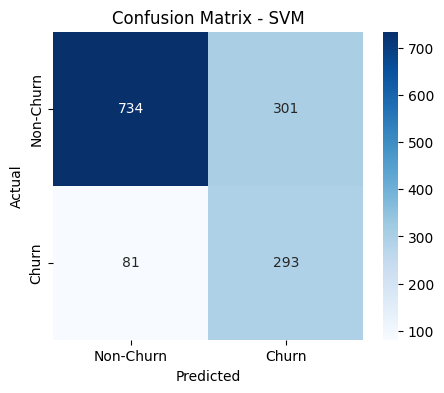

In [ ]:
# SUPPORT VECTOR MACHINE
svm_acc = evaluate_model(SVC(kernel='linear'), "SVM")


📌 KNN Accuracy: 0.6899
              precision    recall  f1-score   support

           0       0.86      0.69      0.76      1035
           1       0.45      0.70      0.55       374

    accuracy                           0.69      1409
   macro avg       0.66      0.69      0.65      1409
weighted avg       0.75      0.69      0.71      1409



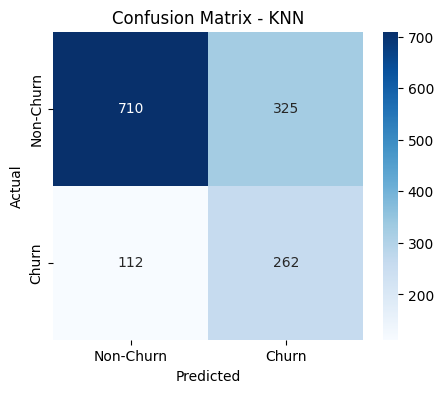

In [ ]:
# K-NEAREST NEIGHBOUR
knn_acc = evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN")


📌 XGBoost Accuracy: 0.7537
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409



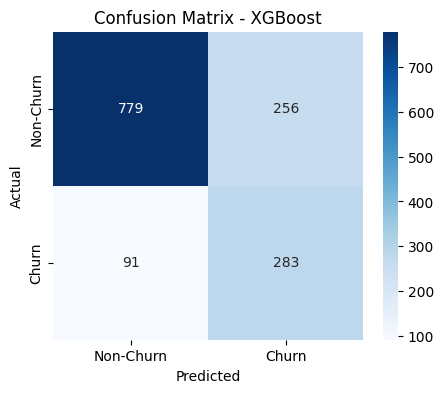

In [ ]:
# eXtreme Gradient Boosting
xgb_acc = evaluate_model(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42), "XGBoost")

In [ ]:
# DISPLAYING RESULTS

print("\n🔹 Model Comparison:")
print(f"Logistic Regression: {logistic_acc:.4f}")
print(f"Random Forest: {rf_acc:.4f}")
print(f"SVM: {svm_acc:.4f}")
print(f"KNN: {knn_acc:.4f}")
print(f"XGBoost: {xgb_acc:.4f}")


🔹 Model Comparison:
Logistic Regression: 0.7324
Random Forest: 0.7672
SVM: 0.7289
KNN: 0.6899
XGBoost: 0.7537


In [ ]:
# COMPARSION OF MODELS BASED ON ACCURACY, PRECISION, RECALL, F1-SCORE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

def get_model_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    return accuracy, precision, recall, f1

# Store scores before SMOTE
accuracy_before, precision_before, recall_before, f1_before = {}, {}, {}, {}
for name, model in models.items():
    acc, prec, rec, f1 = get_model_scores(model, X_train, X_test, y_train, y_test)
    accuracy_before[name] = acc
    precision_before[name] = prec
    recall_before[name] = rec
    f1_before[name] = f1

# Store scores after SMOTE
accuracy_after, precision_after, recall_after, f1_after = {}, {}, {}, {}
for name, model in models.items():
    acc, prec, rec, f1 = get_model_scores(model, X_train_balanced, X_test, y_train_balanced, y_test)
    accuracy_after[name] = acc
    precision_after[name] = prec
    recall_after[name] = rec
    f1_after[name] = f1

def plot_metric_comparison(metric_name, before_values, after_values):
    plt.figure(figsize=(10, 5))
    x = np.arange(len(models))
    width = 0.3
    plt.bar(x - width/2, before_values.values(), width, label="Before SMOTE", color="blue")
    plt.bar(x + width/2, after_values.values(), width, label="After SMOTE", color="orange")
    plt.xticks(x, models.keys(), rotation=30)
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"Model {metric_name} Comparison (Before vs. After SMOTE)")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

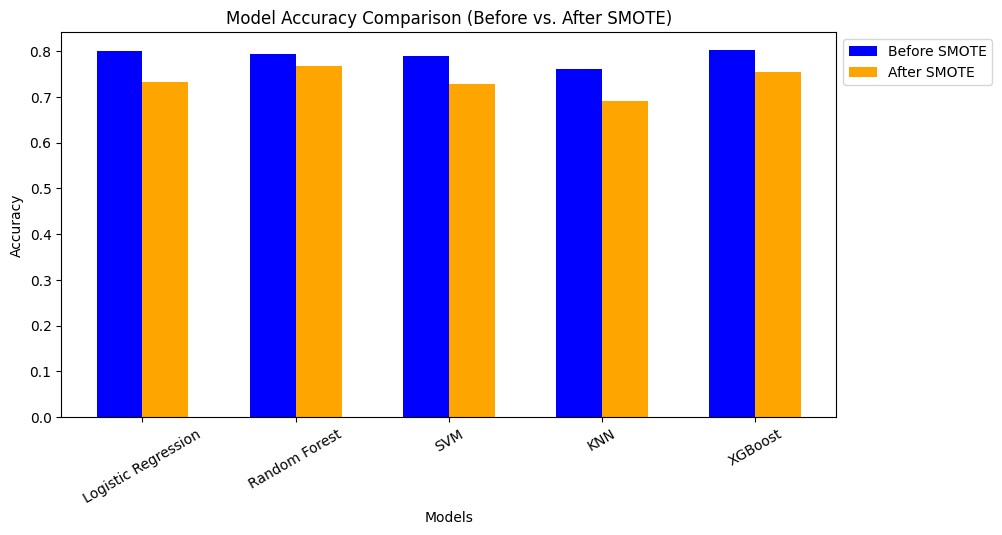

In [ ]:
# ACCURACY
plot_metric_comparison("Accuracy", accuracy_before, accuracy_after)

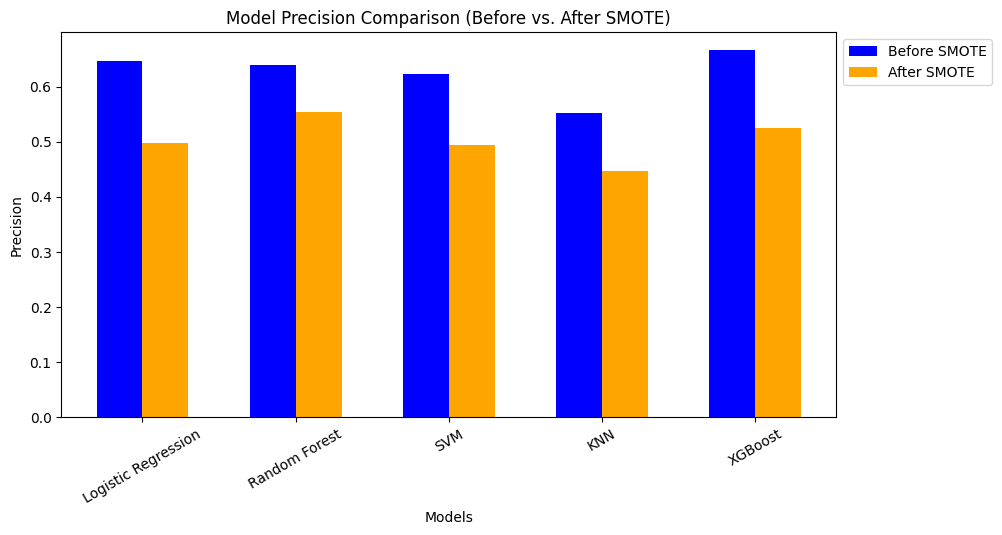

In [ ]:
# PRECISION
plot_metric_comparison("Precision", precision_before, precision_after)

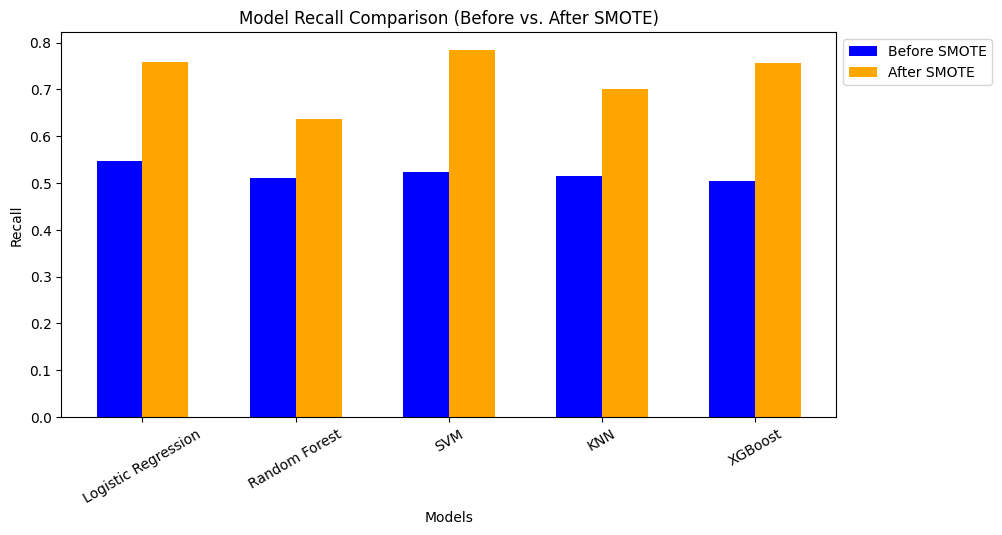

In [ ]:
# RECALL
plot_metric_comparison("Recall", recall_before, recall_after)

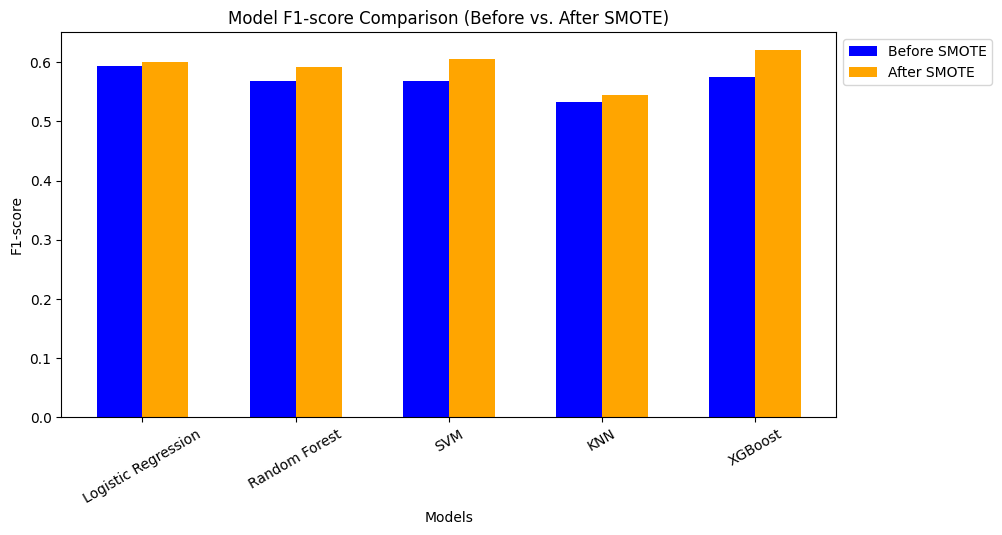

In [ ]:
# F1-SCORE
plot_metric_comparison("F1-score", f1_before, f1_after)

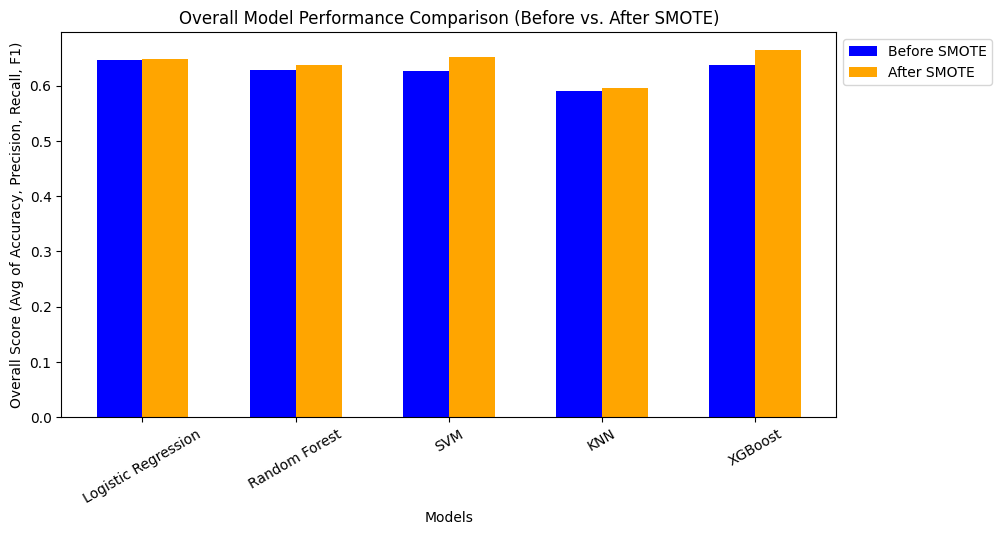

In [ ]:
# COMPUTING OVERALL MODEL PERFORMANCE BEFORE AND AFTER SMOTE

def get_overall_performance(accuracy, precision, recall, f1):
    overall_scores = {}
    for model in models.keys():
        overall_scores[model] = np.mean([accuracy[model], precision[model], recall[model], f1[model]])
    return overall_scores

# Computing overall scores before and after SMOTE
overall_before = get_overall_performance(accuracy_before, precision_before, recall_before, f1_before)
overall_after = get_overall_performance(accuracy_after, precision_after, recall_after, f1_after)

def plot_overall_comparison(before_values, after_values):
    plt.figure(figsize=(10, 5))
    x = np.arange(len(models))
    width = 0.3
    plt.bar(x - width/2, before_values.values(), width, label="Before SMOTE", color="blue")
    plt.bar(x + width/2, after_values.values(), width, label="After SMOTE", color="orange")
    plt.xticks(x, models.keys(), rotation=30)
    plt.xlabel("Models")
    plt.ylabel("Overall Score (Avg of Accuracy, Precision, Recall, F1)")
    plt.title("Overall Model Performance Comparison (Before vs. After SMOTE)")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.show()

plot_overall_comparison(overall_before, overall_after)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standardizing the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (retain components that explain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original Features: {X.shape[1]}, Reduced Features with PCA: {X_pca.shape[1]}")

# Use PCA-transformed dataset
X_final = X_pca

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(" Dimensionality Reduction Completed")


Original Features: 19, Reduced Features with PCA: 16
 Dimensionality Reduction Completed


In [ ]:
# Define hyperparameter grids
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}  # Logistic Regression

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}  # Random Forest

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  # SVM

param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}  # KNN

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9]
}  # XGBoost

print("Identified Hyperparameters for all models ")


Identified Hyperparameters for all models 


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# LOGISTIC REGRESSION (Grid Search)
lr = LogisticRegression()
lr_grid_search = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

# RANDOM FOREST (Grid Search)
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# SVM (Grid Search)
svm = SVC()
svm_grid_search = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

# KNN (Grid Search)
knn = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# XGBoost (Randomized Search)
xgb = XGBClassifier(random_state=42)
xgb_random_search = RandomizedSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', n_iter=10, random_state=42)
xgb_random_search.fit(X_train, y_train)

print(" Hyperparameter Tuning Completed ")

# Display the best parameters
print("\n📌 Best Parameters:")
print(f"Logistic Regression: {lr_grid_search.best_params_}")
print(f"Random Forest: {rf_grid_search.best_params_}")
print(f"SVM: {svm_grid_search.best_params_}")
print(f"KNN: {knn_grid_search.best_params_}")
print(f"XGBoost: {xgb_random_search.best_params_}")


 Hyperparameter Tuning Completed 

📌 Best Parameters:
Logistic Regression: {'C': 0.1}
Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
SVM: {'C': 1, 'kernel': 'rbf'}
KNN: {'n_neighbors': 7, 'weights': 'uniform'}
XGBoost: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
 Hyperparameter Tuning Completed 

📌 Best Parameters:
Logistic Regression: {'C': 0.1}
Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
SVM: {'C': 1, 'kernel': 'rbf'}
KNN: {'n_neighbors': 7, 'weights': 'uniform'}
XGBoost: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }


In [ ]:
print("\n🔹 Logistic Regression:")
lr = LogisticRegression()
before_lr = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Before Optimization:", before_lr)

lr_grid = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy')
lr_grid.fit(X_train, y_train)
best_lr = LogisticRegression(**lr_grid.best_params_)
after_lr = evaluate_model(best_lr, X_train, X_test, y_train, y_test)
print("After Optimization:", after_lr)



🔹 Logistic Regression:
Before Optimization: {'Accuracy': 0.8055358410220014, 'Precision': 0.7968936706986102, 'Recall': 0.8055358410220014, 'F1-Score': 0.7991001613426231}
After Optimization: {'Accuracy': 0.8069552874378992, 'Precision': 0.7982470055970166, 'Recall': 0.8069552874378992, 'F1-Score': 0.8003416446650125}


In [ ]:
print("\n🔹 Random Forest:")
rf = RandomForestClassifier(random_state=42)
before_rf = evaluate_model(rf, X_train, X_test, y_train, y_test)
print("Before Optimization:", before_rf)

rf_grid = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
after_rf = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print("After Optimization:", after_rf)



🔹 Random Forest:
Before Optimization: {'Accuracy': 0.7913413768630234, 'Precision': 0.7776828031367365, 'Recall': 0.7913413768630234, 'F1-Score': 0.7782611833071587}
After Optimization: {'Accuracy': 0.8019872249822569, 'Precision': 0.7905109683060433, 'Recall': 0.8019872249822569, 'F1-Score': 0.7910856686931492}


In [ ]:
print("\n🔹 Support Vector Machine:")
svm = SVC()
before_svm = evaluate_model(svm, X_train, X_test, y_train, y_test)
print("Before Optimization:", before_svm)

svm_grid = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = SVC(**svm_grid.best_params_)
after_svm = evaluate_model(best_svm, X_train, X_test, y_train, y_test)
print("After Optimization:", after_svm)



🔹 Support Vector Machine:
Before Optimization: {'Accuracy': 0.8041163946061036, 'Precision': 0.7937590783041172, 'Recall': 0.8041163946061036, 'F1-Score': 0.7952574296849908}
After Optimization: {'Accuracy': 0.8041163946061036, 'Precision': 0.7937590783041172, 'Recall': 0.8041163946061036, 'F1-Score': 0.7952574296849908}


In [ ]:
print("\n🔹 K-Nearest Neighbors:")
knn = KNeighborsClassifier()
before_knn = evaluate_model(knn, X_train, X_test, y_train, y_test)
print("Before Optimization:", before_knn)

knn_grid = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = KNeighborsClassifier(**knn_grid.best_params_)
after_knn = evaluate_model(best_knn, X_train, X_test, y_train, y_test)
print("After Optimization:", after_knn)



🔹 K-Nearest Neighbors:
Before Optimization: {'Accuracy': 0.7622427253371186, 'Precision': 0.7547925826265175, 'Recall': 0.7622427253371186, 'F1-Score': 0.7578813055861137}
After Optimization: {'Accuracy': 0.7757274662881476, 'Precision': 0.7667927182945107, 'Recall': 0.7757274662881476, 'F1-Score': 0.7700706575892877}


In [ ]:
print("\n🔹 XGBoost:")
xgb = XGBClassifier(random_state=42)
before_xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test)
print("Before Optimization:", before_xgb)

xgb_random = RandomizedSearchCV(xgb, param_grid_xgb, cv=3, scoring='accuracy', n_iter=10, random_state=42)
xgb_random.fit(X_train, y_train)
best_xgb = XGBClassifier(**xgb_random.best_params_, random_state=42)
after_xgb = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)
print("After Optimization:", after_xgb)



🔹 XGBoost:
Before Optimization: {'Accuracy': 0.7735982966643009, 'Precision': 0.763785991316352, 'Recall': 0.7735982966643009, 'F1-Score': 0.7672640910232863}
After Optimization: {'Accuracy': 0.8119233498935415, 'Precision': 0.8020387514586923, 'Recall': 0.8119233498935415, 'F1-Score': 0.8023229838568622}


In [ ]:
import pandas as pd

models = ["Logistic Regression", "Random Forest", "SVM", "KNN", "XGBoost"]
before_tuning = [before_lr, before_rf, before_svm, before_knn, before_xgb]
after_tuning = [after_lr, after_rf, after_svm, after_knn, after_xgb]

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

data = []
for i in range(len(models)):
    data.append({
        "Model": models[i],
        "Accuracy (Before)": before_tuning[i]["Accuracy"],
        "Precision (Before)": before_tuning[i]["Precision"],
        "Recall (Before)": before_tuning[i]["Recall"],
        "F1-Score (Before)": before_tuning[i]["F1-Score"],
        "Accuracy (After)": after_tuning[i]["Accuracy"],
        "Precision (After)": after_tuning[i]["Precision"],
        "Recall (After)": after_tuning[i]["Recall"],
        "F1-Score (After)": after_tuning[i]["F1-Score"]
    })

comparison_df = pd.DataFrame(data)

print(comparison_df)


                 Model  Accuracy (Before)  Precision (Before)  \
0  Logistic Regression           0.805536            0.796894   
1        Random Forest           0.791341            0.777683   
2                  SVM           0.804116            0.793759   
3                  KNN           0.762243            0.754793   
4              XGBoost           0.773598            0.763786   

   Recall (Before)  F1-Score (Before)  Accuracy (After)  Precision (After)  \
0         0.805536           0.799100          0.806955           0.798247   
1         0.791341           0.778261          0.801987           0.790511   
2         0.804116           0.795257          0.804116           0.793759   
3         0.762243           0.757881          0.775727           0.766793   
4         0.773598           0.767264          0.811923           0.802039   

   Recall (After)  F1-Score (After)  
0        0.806955          0.800342  
1        0.801987          0.791086  
2        0.804116         

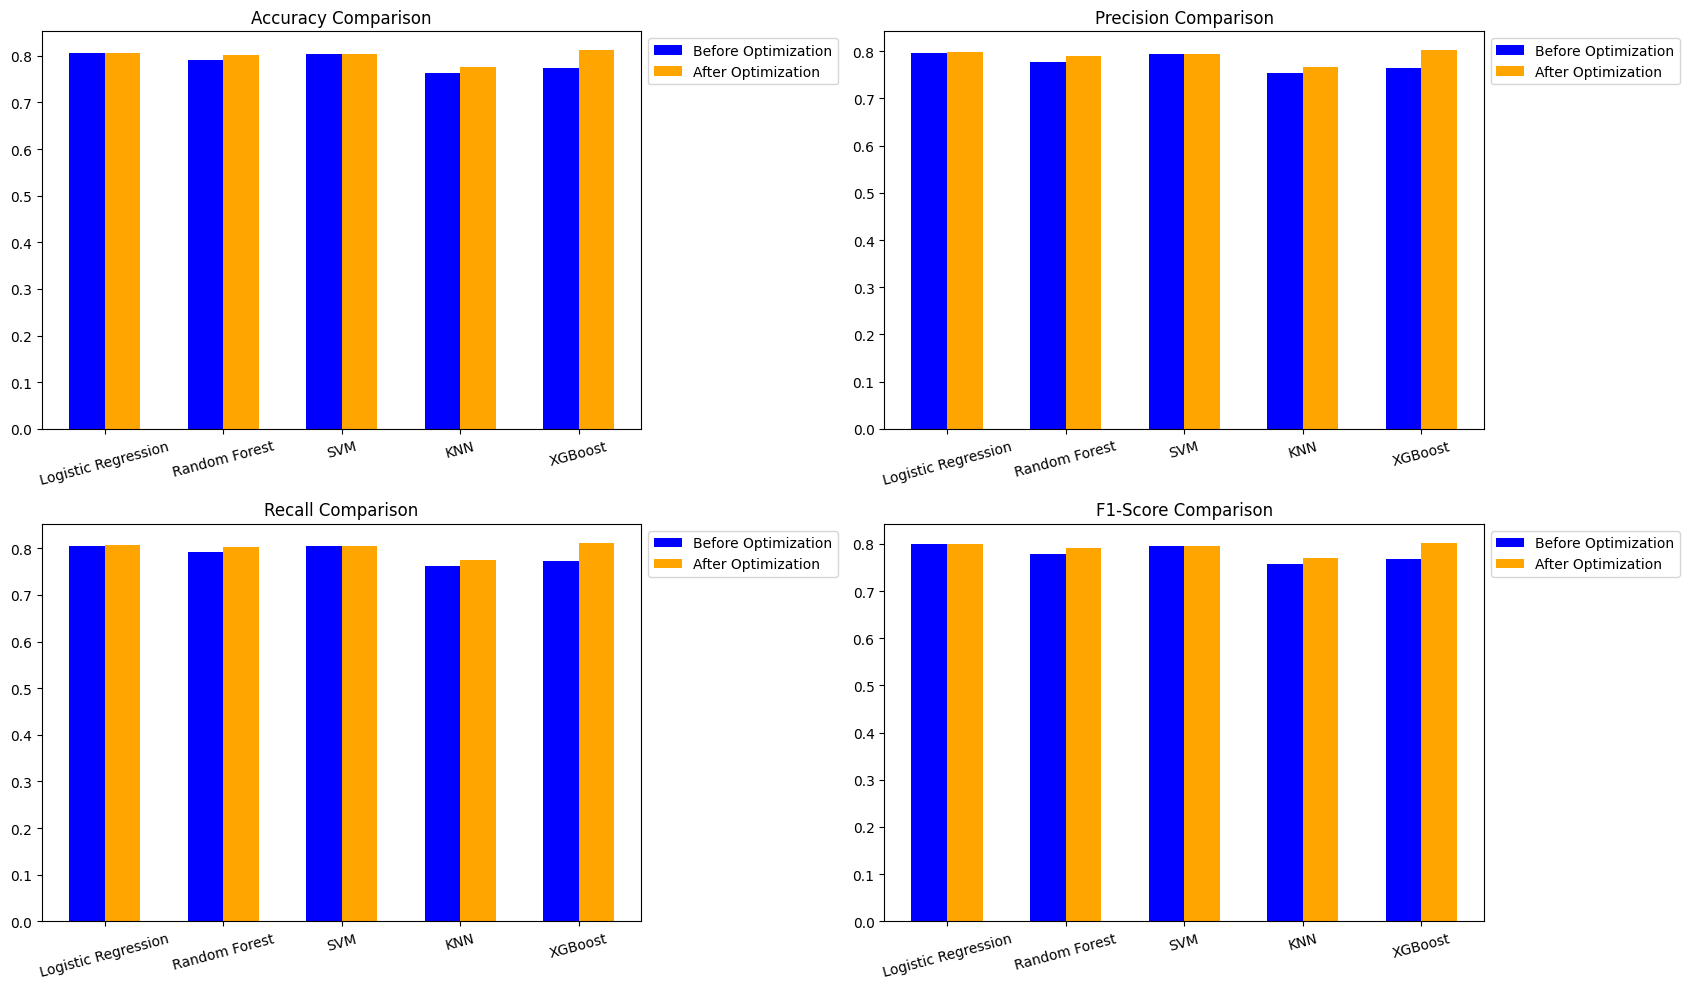

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 10))
bar_width = 0.3
x = np.arange(len(models))

def plot_bars(ax, metric, index):
    before_values = [before_tuning[i][metric] for i in range(len(models))]
    after_values = [after_tuning[i][metric] for i in range(len(models))]

    ax.bar(x - bar_width / 2, before_values, width=bar_width, label="Before Optimization", color="blue")
    ax.bar(x + bar_width / 2, after_values, width=bar_width, label="After Optimization", color="orange")

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=15)
    ax.set_title(f"{metric} Comparison")
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

metrics_list = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics_list):
    plot_bars(axes[i // 2, i % 2], metric, i)

plt.tight_layout()
plt.show()


In [ ]:
best_model = comparison_df.iloc[comparison_df["Accuracy (After)"].idxmax()]["Model"]
print(f"\n Best Model After Optimization: {best_model} ")



 Best Model After Optimization: XGBoost 


Fine-Tuned Base Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.801987   0.790511  0.801987  0.791086
1                  SVM  0.804116   0.793759  0.804116  0.795257
2                  KNN  0.775727   0.766793  0.775727  0.770071
3  Logistic Regression  0.806955   0.798247  0.806955  0.800342
4              XGBoost  0.811923   0.802039  0.811923  0.802323
Ensemble Model Performance:
      Ensemble Method  Accuracy  Precision    Recall  F1-Score
0             Bagging  0.788502   0.773678  0.788502  0.766080
1  Boosting (XGBoost)  0.812633   0.803037  0.812633  0.803680
2            Stacking  0.795600   0.783543  0.795600  0.785031
3              Voting  0.801278   0.790080  0.801278  0.791264


<ipython-input-130-06ab3b8ed416>:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ensemble Method', y='Accuracy', data=ensemble_df, palette='viridis')


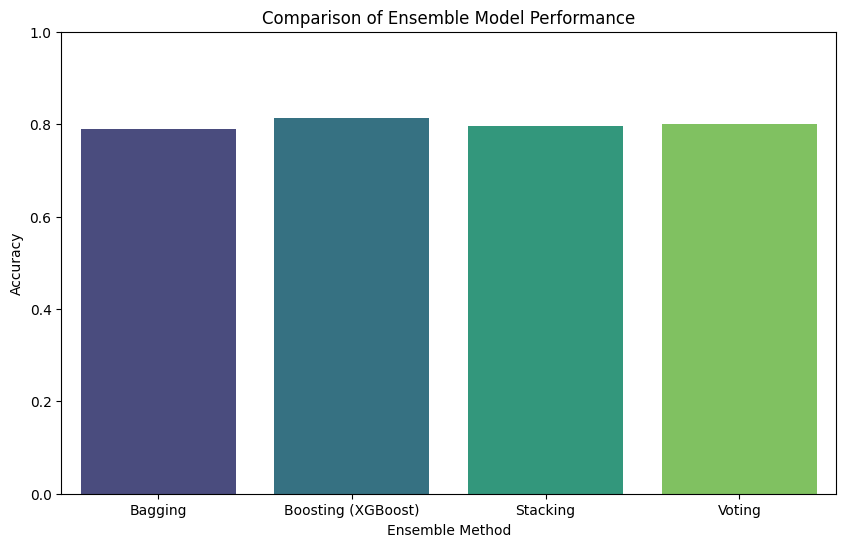

In [ ]:
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fine-tuned models from Grid Search and Random Search
best_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_svm = SVC(**svm_grid.best_params_, probability=True, random_state=42)
best_knn = KNeighborsClassifier(**knn_grid.best_params_)
best_lr = LogisticRegression(**lr_grid.best_params_, random_state=42)
best_xgb = XGBClassifier(**xgb_random.best_params_, random_state=42)

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

# Evaluate fine-tuned base models
models = [best_rf, best_svm, best_knn, best_lr, best_xgb]
model_names = ["Random Forest", "SVM", "KNN", "Logistic Regression", "XGBoost"]
model_results = [evaluate_model(model, X_train, X_test, y_train, y_test) for model in models]

# Store results in DataFrame
data = []
for i in range(len(models)):
    data.append({
        "Model": model_names[i],
        "Accuracy": model_results[i]["Accuracy"],
        "Precision": model_results[i]["Precision"],
        "Recall": model_results[i]["Recall"],
        "F1-Score": model_results[i]["F1-Score"]
    })
comparison_df = pd.DataFrame(data)
print("Fine-Tuned Base Model Performance:")
print(comparison_df)

# Function to evaluate ensemble models
def evaluate_ensemble(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

# Ensemble Models using Fine-Tuned Models
# Optimized Bagging
bagging = BaggingClassifier(estimator=best_rf, n_estimators=150, max_samples=0.8, max_features=0.8, random_state=42)
bagging_results = evaluate_ensemble(bagging, X_train, X_test, y_train, y_test)

# Optimized Boosting
best_xgb.set_params(learning_rate=0.03, n_estimators=200)
best_xgb_results = evaluate_ensemble(best_xgb, X_train, X_test, y_train, y_test)

# Optimized Stacking
stacking = StackingClassifier(
    estimators=[
        ('rf', best_rf),
        ('svm', best_svm),
        ('knn', best_knn),
        ('lr', best_lr)
    ],
    final_estimator=RandomForestClassifier(n_estimators=50, random_state=42),
    passthrough=True
)
stacking_results = evaluate_ensemble(stacking, X_train, X_test, y_train, y_test)

# Adjusted Voting Weights
weights = [model_results[i]["Accuracy"]**2 for i in range(len(model_results))]
voting = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('svm', best_svm),
        ('knn', best_knn),
        ('lr', best_lr),
        ('xgb', best_xgb)
    ],
    voting='soft',
    weights=weights
)
voting_results = evaluate_ensemble(voting, X_train, X_test, y_train, y_test)

# Compare Ensemble Models
ensemble_results = {
    "Bagging": bagging_results,
    "Boosting (XGBoost)": best_xgb_results,
    "Stacking": stacking_results,
    "Voting": voting_results
}

# Convert results to DataFrame for visualization
data = []
for key, value in ensemble_results.items():
    data.append({
        "Ensemble Method": key,
        "Accuracy": value["Accuracy"],
        "Precision": value["Precision"],
        "Recall": value["Recall"],
        "F1-Score": value["F1-Score"]
    })
ensemble_df = pd.DataFrame(data)

print("Ensemble Model Performance:")
print(ensemble_df)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Ensemble Method', y='Accuracy', data=ensemble_df, palette='viridis')
plt.title('Comparison of Ensemble Model Performance')
plt.ylim(0, 1)
plt.xlabel('Ensemble Method')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Find the best ensemble method based on accuracy
best_ensemble = ensemble_df.loc[ensemble_df['Accuracy'].idxmax()]
print("\nBest Ensemble Method:")
print(best_ensemble)



Best Ensemble Method:
Ensemble Method    Boosting (XGBoost)
Accuracy                     0.812633
Precision                    0.803037
Recall                       0.812633
F1-Score                      0.80368
Name: 1, dtype: object



Confusion Matrix for Bagging:
 [[970  66]
 [232 141]]


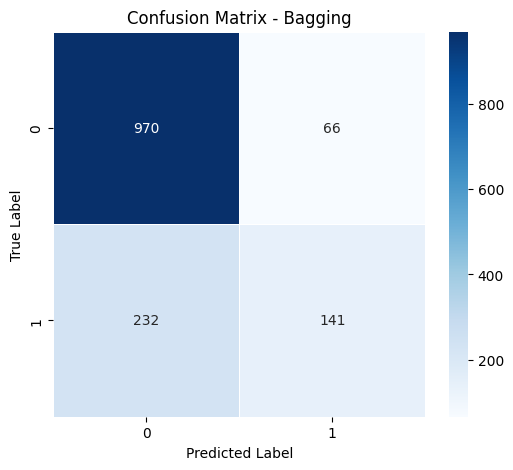


Confusion Matrix for Boosting (XGBoost):
 [[949  87]
 [177 196]]


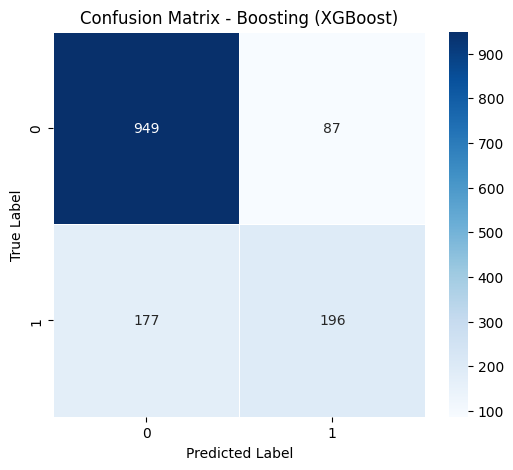


Confusion Matrix for Stacking:
 [[940  96]
 [192 181]]


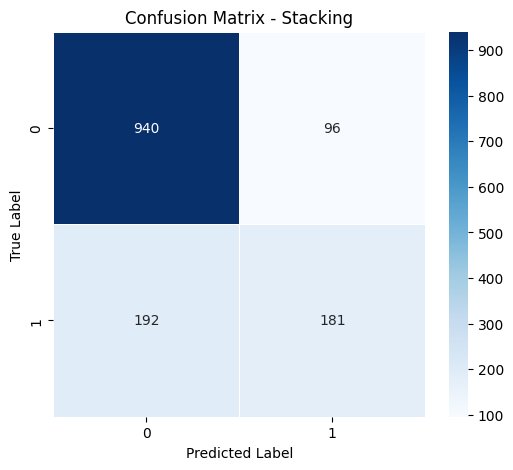


Confusion Matrix for Voting:
 [[943  93]
 [187 186]]


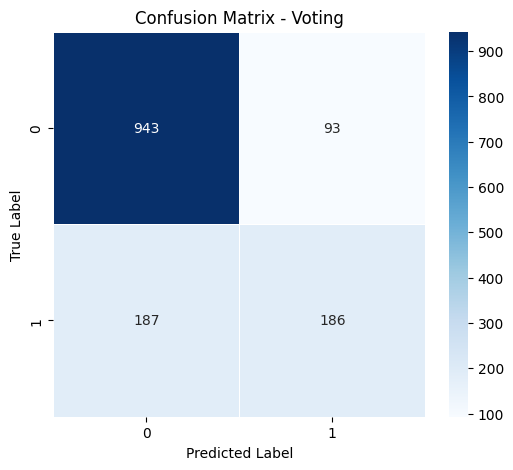

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to evaluate ensemble models and return confusion matrix
def evaluate_ensemble(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": conf_matrix
    }

# Evaluate ensemble models with confusion matrices
bagging_results = evaluate_ensemble(bagging, X_train, X_test, y_train, y_test)
best_xgb_results = evaluate_ensemble(best_xgb, X_train, X_test, y_train, y_test)
stacking_results = evaluate_ensemble(stacking, X_train, X_test, y_train, y_test)
voting_results = evaluate_ensemble(voting, X_train, X_test, y_train, y_test)

# Dictionary to store all results
ensemble_results = {
    "Bagging": bagging_results,
    "Boosting (XGBoost)": best_xgb_results,
    "Stacking": stacking_results,
    "Voting": voting_results
}

# Print and visualize confusion matrices
for key, value in ensemble_results.items():
    print(f"\nConfusion Matrix for {key}:\n", value["Confusion Matrix"])

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(value["Confusion Matrix"], annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.title(f'Confusion Matrix - {key}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
import pickle

# Save the trained model, PCA, and Scaler
model_data = {
    "model": best_xgb,  # Your trained XGBoost model
    "scaler": scaler,  # The StandardScaler used before PCA
    "pca": pca  # The trained PCA transformation
}

with open("xgboost_pca_model.pkl", "wb") as f:
    pickle.dump(model_data, f)


# Save the StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("pca.pkl", "wb") as f:
        pickle.dump(pca, f)


print("Model, PCA, and Scaler saved successfully!")


In [ ]:
import os
import pickle
import numpy as np
import pandas as pd

# Load the trained model, PCA, and Scaler
with open("xgboost_pca_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
scaler = model_data["scaler"]
pca = model_data["pca"]

print("Model, PCA, and Scaler loaded successfully!")

# Load encoders
if os.path.exists("encoders.pkl"):
    with open("encoders.pkl", "rb") as f:
        encoders = pickle.load(f)
    print("Encoders loaded successfully!")
else:
    raise FileNotFoundError("Error: encoders.pkl file not found!")

# Define new input data
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Convert input data to DataFrame
input_data_df = pd.DataFrame([input_data])

# Ensure 'TotalCharges' is numerical
input_data_df['TotalCharges'] = input_data_df['TotalCharges'].astype(float)

# Encode categorical features using saved encoders
# Encode categorical features using saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:  # Avoid missing key error
        input_data_df[column] = encoder.transform(input_data_df[column].astype(str))
    else:
        print(f"Warning: '{column}' not found in input data. Skipping encoding.")


# Standardize using the saved scaler
input_data_scaled = scaler.transform(input_data_df)

# Apply PCA transformation
input_data_pca = pca.transform(input_data_scaled)

# Debugging PCA input shape
print(f"Expected PCA input shape: {pca.n_components_}")
print(f"Actual input shape: {input_data_pca.shape}")

# Make prediction
prediction = loaded_model.predict(input_data_pca)
pred_prob = loaded_model.predict_proba(input_data_pca)

# Display results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")


Model, PCA, and Scaler loaded successfully!
Encoders loaded successfully!
Expected PCA input shape: 16
Actual input shape: (1, 16)
Prediction: No Churn
Prediction Probability: [[0.81407475 0.18592525]]


In [ ]:
import pickle

# Save the trained model, PCA, and Scaler as .sav
model_data = {
    "model": best_xgb,  # Your trained XGBoost model
    "scaler": scaler,  # The StandardScaler used before PCA
    "pca": pca  # The trained PCA transformation
}

with open("xgboost_pca_model.sav", "wb") as f:
    pickle.dump(model_data, f)

# Save the StandardScaler separately
with open("scaler.sav", "wb") as f:
    pickle.dump(scaler, f)

# Save the PCA transformation separately
with open("pca.sav", "wb") as f:
    pickle.dump(pca, f)

# Save encoders as .sav
with open("encoders.sav", "wb") as f:
    pickle.dump(encoders, f)

print("Model, PCA, Scaler, and Encoders saved successfully as .sav files!")


Model, PCA, Scaler, and Encoders saved successfully as .sav files!


In [153]:
import os
import pickle
import numpy as np
import pandas as pd

# **Step 1: Load the Trained Model, PCA, and Scaler**
with open("xgboost_pca_model.sav", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
scaler = model_data["scaler"]
pca = model_data["pca"]

print(" Model, PCA, and Scaler loaded successfully!")

# **Step 2: Load Encoders**
if os.path.exists("encoders.sav"):
    with open("encoders.sav", "rb") as f:
        encoders = pickle.load(f)
    print("Encoders loaded successfully!")
else:
    raise FileNotFoundError("Error: encoders.sav file not found!")

# **Step 3: Define New Input Data for Prediction**
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# **Step 4: Convert Input Data to DataFrame**
input_data_df = pd.DataFrame([input_data])

# Ensure 'TotalCharges' is numerical
input_data_df['TotalCharges'] = input_data_df['TotalCharges'].astype(float)

# **Step 5: Encode Categorical Features Using Saved Encoders**
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column].astype(str))
    else:
        print(f" Warning: '{column}' not found in input data. Skipping encoding.")

# **Step 6: Standardize Using the Saved Scaler**
input_data_scaled = scaler.transform(input_data_df)

# **Step 7: Apply PCA Transformation**
input_data_pca = pca.transform(input_data_scaled)

# Debugging PCA input shape
print(f" Expected PCA input shape: {pca.n_components_}")
print(f" Actual input shape: {input_data_pca.shape}")

# **Step 8: Make Prediction**
prediction = loaded_model.predict(input_data_pca)
pred_prob = loaded_model.predict_proba(input_data_pca)

# **Step 9: Display Results**
print(f" Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f" Prediction Probability: {pred_prob}")


 Model, PCA, and Scaler loaded successfully!
Encoders loaded successfully!
 Expected PCA input shape: 16
 Actual input shape: (1, 16)
 Prediction: No Churn
 Prediction Probability: [[0.8603793  0.13962072]]


In [ ]:
print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64
